In [1]:
import numpy as np
import pandas as pd
from scipy.stats import binom
from scipy.stats import uniform
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az
import pymc3 as pm
import arviz

from sklearn.linear_model import LinearRegression

from sklearn.isotonic import IsotonicRegression
from sklearn.model_selection import train_test_split        # train and test split
from sklearn.metrics import explained_variance_score
seed = 73073

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## MCMC coin


In [3]:


# Datos (resultado de lanzar una moneda: 1 para cara, 0 para cruz)
data = np.array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

# Crear el modelo en PyMC3
with pm.Model() as coin_model:
    # Prior uniforme para la probabilidad de cara (entre 0 y 1)
    p = pm.Uniform("p", 0, 1)
    
    # Verosimilitud
    likelihood = pm.Bernoulli("likelihood", p, observed=data)
    
    # Realizar el muestreo de la cadena de Markov Monte Carlo
    #trace = pm.sample(1000, tune=1000)
    trace = pm.sample(1000, tune=1000, chains=2)

# Resultados del muestreo
pm.summary(trace)

 

C:\Users\Hossein\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 57 seconds.
C:\Users\Hossein\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.669,0.129,0.436,0.907,0.005,0.003,791.0,1250.0,1.0


mcse_mean: El error estándar de la media de la distribución posterior para p.

mcse_sd: El error estándar de la desviación estándar de la distribución posterior para p.

ess_bulk, ess_tail: el número efectivo de muestras (Effective Sample Size) para el cuerpo y la cola de la cadena de Markov, respectivamente. 

El estadístico R-hat (Gelman-Rubin R-hat) se utiliza para evaluar la convergencia de las cadenas de Markov. Un valor de 1.0 indica que las cadenas han convergido. Valores significativamente mayores que 1 pueden indicar problemas de convergencia.

C:\Users\Hossein\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

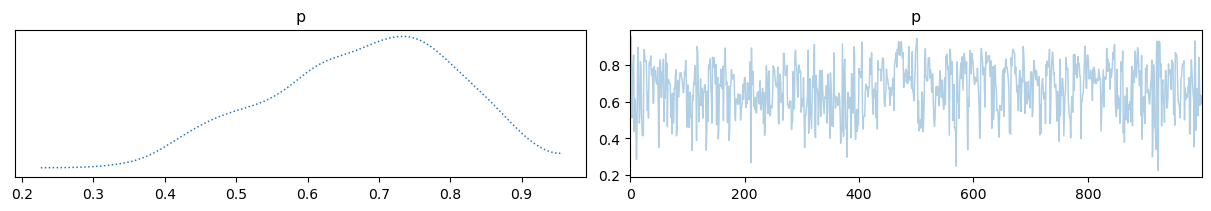

In [13]:
az.plot_trace(trace, combined=True)

C:\Users\Hossein\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'p'}>

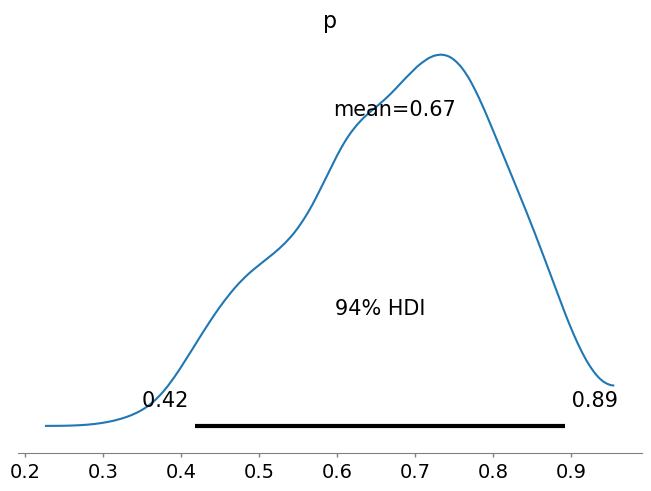

In [14]:
az.plot_posterior(trace)

C:\Users\Hossein\anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'95.0% HDI'}>], dtype=object)

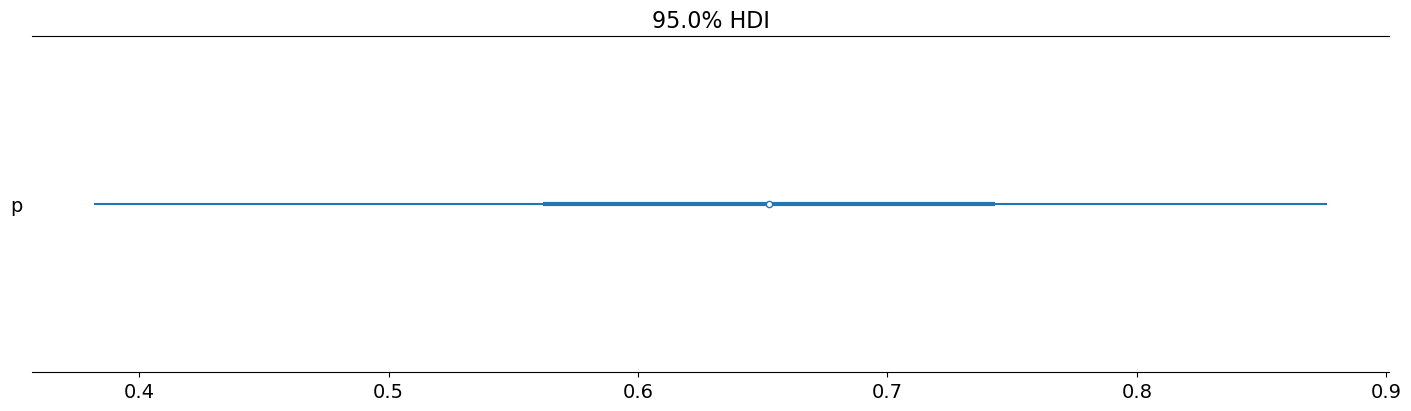

In [20]:
pm.plot_forest(trace, var_names=["p"], hdi_prob = 0.95, figsize = (14,4))
